In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datas = pd.read_csv('titanic_data.csv')

In [3]:
datas.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print(datas.shape)   

(891, 12)


In [6]:
missing_data = datas.isnull().sum()
print("Missing values :\n", missing_data)

Missing values :
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
datas['Age'] = datas['Age'].fillna(datas['Age'].median())

In [8]:
print(datas.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [9]:
datas['Cabin'] = datas['Cabin'].fillna(datas['Cabin'].mode()[0])

In [10]:
datas['Embarked'] = datas['Embarked'].fillna(datas['Embarked'].mode()[0])

In [11]:
missing_data = datas.isnull().sum()
print("Missing values :\n", missing_data)

Missing values :
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [12]:
scaler= MinMaxScaler()
datas[['Age','Fare']]= scaler.fit_transform(datas[['Age','Fare']])

In [13]:
datas.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.014151,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.139136,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.015469,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.103644,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.015713,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,0.346569,0,0,330877,0.016510,B96 B98,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,0.673285,0,0,17463,0.101229,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,0.019854,3,1,349909,0.041136,B96 B98,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0.334004,0,2,347742,0.021731,B96 B98,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,0.170646,1,0,237736,0.058694,B96 B98,C


In [14]:
label_encoder= LabelEncoder()
datas['Sex'] = label_encoder.fit_transform(datas['Sex'])
datas.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,1,0,A/5 21171,0.014151,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,1,0,PC 17599,0.139136,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0,0,STON/O2. 3101282,0.015469,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1,0,113803,0.103644,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,0.434531,0,0,373450,0.015713,B96 B98,S


In [15]:
value_counts = datas['Embarked'].value_counts()
print(value_counts)


Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [16]:
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
datas['Embarked'] = datas['Embarked'].map(embarked_mapping)

In [17]:
datas.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,1,0,A/5 21171,0.014151,B96 B98,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,1,0,PC 17599,0.139136,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0,0,STON/O2. 3101282,0.015469,B96 B98,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1,0,113803,0.103644,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,0.434531,0,0,373450,0.015713,B96 B98,0
5,6,0,3,"Moran, Mr. James",1,0.346569,0,0,330877,0.016510,B96 B98,2
6,7,0,1,"McCarthy, Mr. Timothy J",1,0.673285,0,0,17463,0.101229,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,0.019854,3,1,349909,0.041136,B96 B98,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0.334004,0,2,347742,0.021731,B96 B98,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,0.170646,1,0,237736,0.058694,B96 B98,1


In [18]:
value_counts = datas['Cabin'].value_counts()
print(value_counts)


Cabin
B96 B98        691
G6               4
C23 C25 C27      4
C22 C26          3
F33              3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 147, dtype: int64


In [19]:
datas = datas.drop(columns=['PassengerId', 'Name', 'Cabin','Ticket'])


In [20]:
datas.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,0
1,1,1,0,0.472229,1,0,0.139136,1
2,1,3,0,0.321438,0,0,0.015469,0
3,1,1,0,0.434531,1,0,0.103644,0
4,0,3,1,0.434531,0,0,0.015713,0
5,0,3,1,0.346569,0,0,0.016510,2
6,0,1,1,0.673285,0,0,0.101229,0
7,0,3,1,0.019854,3,1,0.041136,0
8,1,3,0,0.334004,0,2,0.021731,0
9,1,2,0,0.170646,1,0,0.058694,1


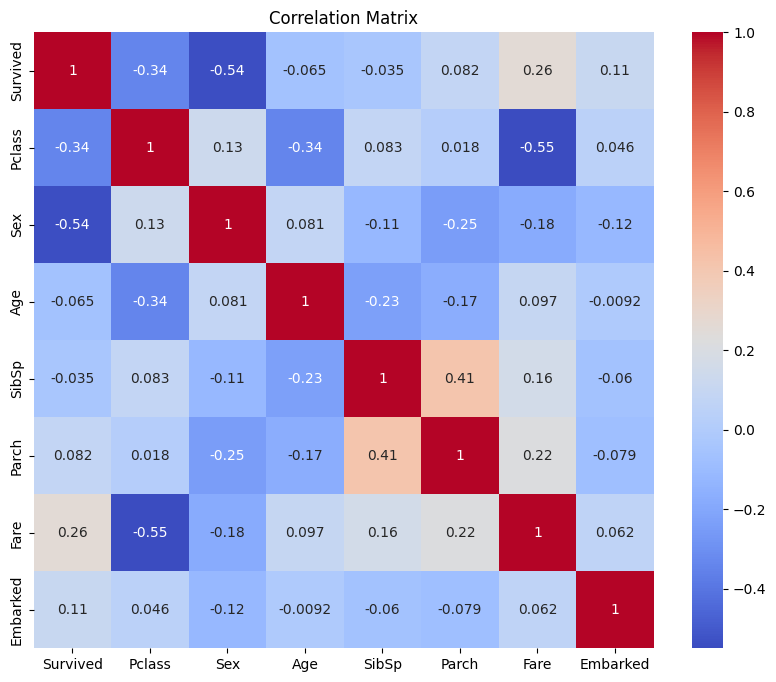

In [21]:
correlation_matrix = datas.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [22]:
datas['FamilySize'] = datas['SibSp'] + datas['Parch']

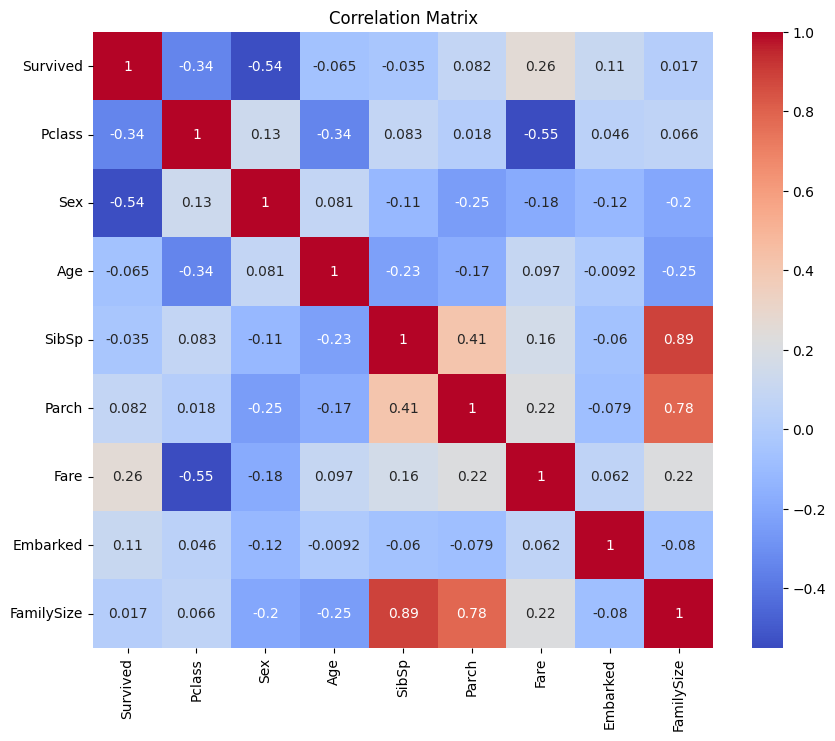

In [23]:
correlation_matrix = datas.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

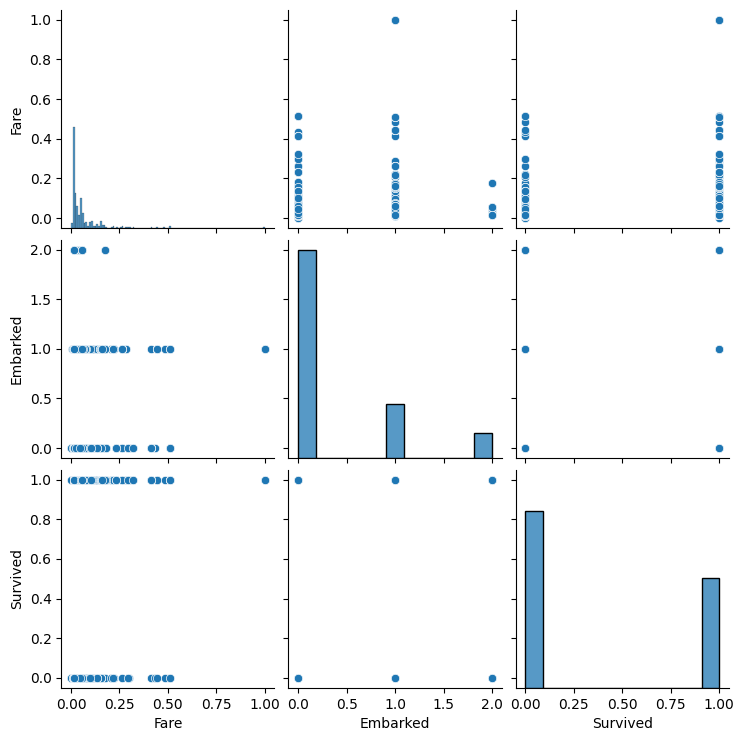

In [24]:
sns.pairplot(datas[['Fare', 'Embarked', 'Survived']])
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

x_set = datas[['Fare', 'Embarked']]
y_set = datas[['Survived']]
x_train,x_test,y_train,y_test=train_test_split(x_set, y_set,test_size=0.2)

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\alepr\myenv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [27]:
y_pred = model.predict(x_test)

In [28]:
# Calculate accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.70


In [29]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[112   3]
 [ 51  13]]


In [30]:
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.97      0.81       115
           1       0.81      0.20      0.33        64

    accuracy                           0.70       179
   macro avg       0.75      0.59      0.57       179
weighted avg       0.73      0.70      0.63       179



In [31]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [32]:
y_pred = tree_model.predict(x_test)


In [33]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7039106145251397


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       115
           1       0.66      0.36      0.46        64

    accuracy                           0.70       179
   macro avg       0.69      0.63      0.63       179
weighted avg       0.69      0.70      0.68       179



In [35]:
from sklearn.svm import SVC

In [36]:
svm_model = SVC(kernel='linear', random_state=42)

In [37]:
svm_model.fit(x_train, y_train)

C:\Users\alepr\myenv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=42)

In [38]:
y_pred = svm_model.predict(x_test)


In [39]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.6815642458100558


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.99      0.80       115
           1       0.89      0.12      0.22        64

    accuracy                           0.68       179
   macro avg       0.78      0.56      0.51       179
weighted avg       0.75      0.68      0.59       179



In [41]:
import joblib
joblib.dump(svm_model, 'svm_model.joblib')
joblib.dump(tree_model, 'decision_tree_model.joblib')
joblib.dump(model, 'logistic_reg.joblib')


['logistic_reg.joblib']